In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis

In [2]:
data = pd.read_csv("data.csv", header=0, delimiter = ";")

In [4]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P7,P8,P9,P10,age,gender,accuracy,country,source,elapsed
0,1,4,2,3,3,2,3,4,4,3,...,1,2,5,2,17,1,92,US,6,914.0
1,4,3,4,3,4,4,4,4,2,2,...,3,2,2,2,37,1,100,US,1,891.0
2,3,4,4,4,4,4,4,3,2,2,...,2,3,3,3,31,1,80,US,6,903.0
3,4,5,4,4,4,3,3,2,2,2,...,2,3,4,4,32,1,93,US,1,806.0
4,4,0,4,4,4,3,5,1,2,4,...,4,2,3,2,46,2,87,NZ,1,1826.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,24,1,100,IN,1,274.0
49155,4,5,4,4,4,3,5,3,2,3,...,3,4,4,4,22,1,50,ZA,1,584.0
49156,2,4,2,3,3,3,4,4,2,4,...,3,4,5,4,29,2,85,BE,6,932.0
49157,4,4,4,4,4,4,4,4,1,3,...,2,4,5,4,48,1,95,CZ,2,1212.0


In [5]:
col_data = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10",
            "E1","E2","E3","E4","E5","E6","E7","E8","E9","E10",
            "H1","H2","H3","H4","H5","H6","H7","H8","H9","H10",
            "I1","I2","I3","I4","I5","I6","I7","I8","I9","I10",
            "N1","N2","N3","N4","N5","N6","N7","N8","N9","N10"]
X = data[col_data]

In [6]:
X.size

2457950

In [ ]:
#Check data for 0s in dataset. 0 is a missed question
mask = ~np.any(X == 0, axis=1)
mask

X = X[mask]

In [9]:
warmth_col = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10"]
warmth = X[warmth_col]

dom_col = ["E1","E2","E3","E4","E5","E6","E7","E8","E9","E10"]
dominance = X[dom_col]

bold_col = ["H1","H2","H3","H4","H5","H6","H7","H8","H9","H10"]
boldness = X[bold_col]

sens_col = ["I1","I2","I3","I4","I5","I6","I7","I8","I9","I10"]
sensitivity  = X[sens_col]

priv_col = ["N1","N2","N3","N4","N5","N6","N7","N8","N9","N10"]
privateness  = X[priv_col]

In [10]:
warmth

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,1,4,2,3,3,2,3,4,4,3
1,4,3,4,3,4,4,4,4,2,2
3,4,5,4,4,4,3,3,2,2,2
5,3,5,4,4,4,5,5,1,1,4
6,4,2,5,4,2,4,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...
49153,4,4,5,4,3,3,5,3,1,2
49154,1,1,1,1,1,1,1,1,1,1
49156,2,4,2,3,3,3,4,4,2,4
49157,4,4,4,4,4,4,4,4,1,3


<Axes: >

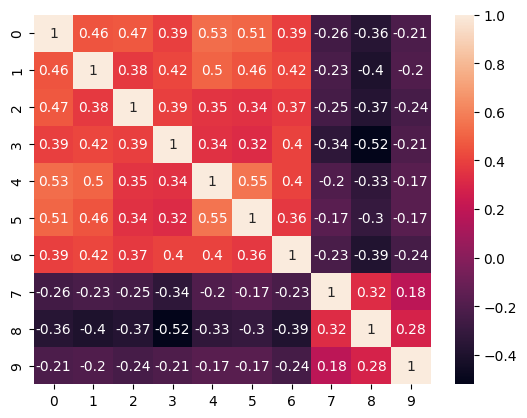

In [11]:
corr = np.corrcoef(warmth, rowvar=False)
sns.heatmap(corr, annot=True)
#Questions 8,9,10 are asked in the negative sense, this explains the negative correlations

<Axes: >

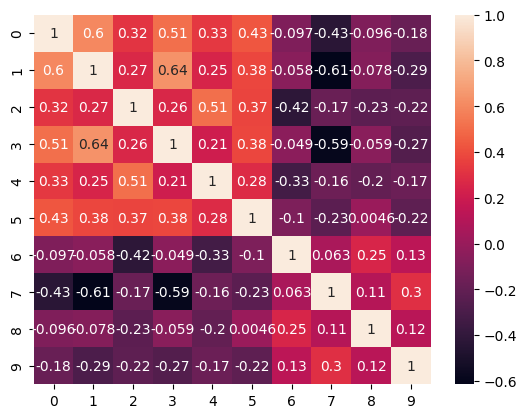

In [12]:
corr = np.corrcoef(dominance, rowvar=False)
sns.heatmap(corr, annot=True)

<Axes: >

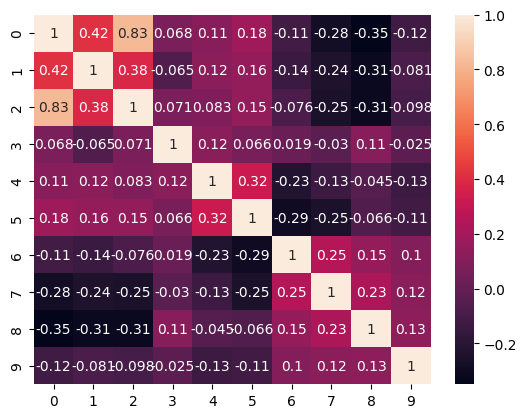

In [13]:
corr = np.corrcoef(boldness, rowvar=False)
sns.heatmap(corr, annot=True)

<Axes: >

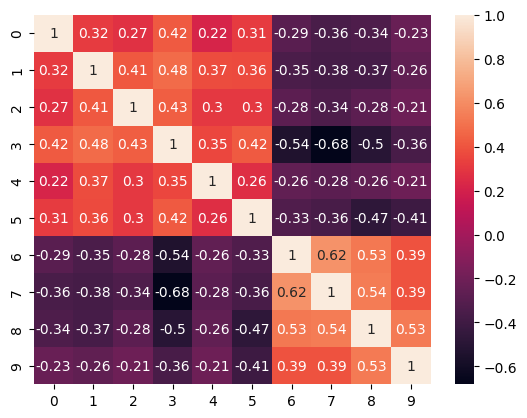

In [14]:
corr = np.corrcoef(sensitivity, rowvar=False)
sns.heatmap(corr, annot=True)

<Axes: >

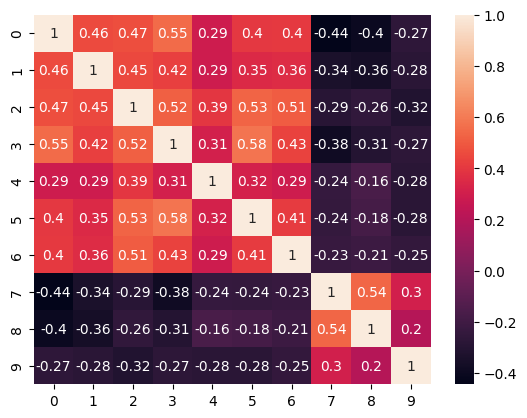

In [15]:
corr = np.corrcoef(privateness, rowvar=False)
sns.heatmap(corr, annot=True)

In [16]:
# Step 1: Standardize the data (mean centering)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis = 0)
#X_centered = X - X_mean

X_centered = (X - X_mean) / X_std

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

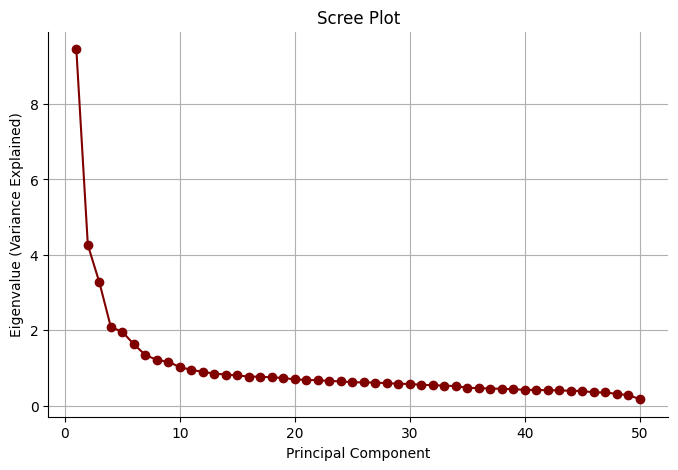

In [17]:
# Scree plot ("explained variance" by each principal component)
f, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker='o', linestyle='-', color="maroon")
ax.set_xlabel('Principal Component')
ax.set_ylabel('Eigenvalue (Variance Explained)')
ax.set_title('Scree Plot')
ax.grid(True)
sns.despine(ax=ax)

In [18]:
pca = PCA(n_components = 4).fit(X)

In [19]:
X_pca = pca.transform(X)

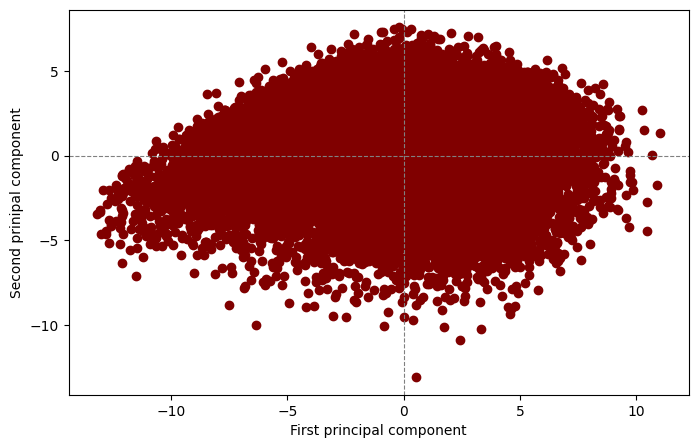

In [20]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(X_pca[:, 0], X_pca[:, 1], color="maroon")
ax.set_xlabel("First principal component")
ax.set_ylabel("Second prinipal component")
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)

In [21]:
# Always a good idea to standardize the data before FA
X = StandardScaler().fit_transform(X)

# Fitting done easy
#Specify how many components we want
fa = FactorAnalysis(n_components = 4).fit(X)

In [71]:
# Inspect loadings
factor_loadings = fa.components_.T
loadings_df = pd.DataFrame(factor_loadings, 
                                  index=col_data, 
                                  columns=["Factor 1", "Factor 2", "Factor 3", "Factor 4"])
loadings_df

,Factor 1,Factor 2,Factor 3,Factor 4
A1,-0.474654,-0.262700,0.099684,-0.362569
A2,-0.590237,-0.255216,0.161663,-0.258621
A3,-0.328868,-0.297414,0.029824,-0.372867
A4,-0.433498,-0.284013,0.055009,-0.242043
A5,-0.541950,-0.242529,0.167015,-0.338906
A6,-0.471578,-0.264000,0.071382,-0.324319
A7,-0.433904,-0.250533,-0.000009,-0.277350
A8,0.300397,0.161779,-0.017034,0.047607
A9,0.489540,0.295516,0.041588,0.127723
A10,0.195942,0.239605,0.065502,0.104295


At a glance the loadings weren't incredible for most variables, so taking the range seemed like a good way to illustrate that. If the smallest and largest values aren't even close to -0.7 or 0.7 then a range smaller than that is good to show. 0.7 likely isn't a good enough loading to note either. 
Warmth (A)
    Loading min and max for Factor 1: -0.54, 0.48. Slight relationship, but not a good loading. No strong relationship
    Loading min and max for Factor 2: -0.297, 0.295. Very slight relationship, but worse loadings than Factor 1. No good loadings
    Loading min and max for Factor 3: -0.01, 0.167. No good loadings
    Loading min and max for Factor 4: -0.37, 0.127. No good loadings 
    Overall: No strong loadings for any factors across Warmth category. Warmth loaded the most on Factor 1, though it wasn't a good loading.
Dominance (E)
    Loading min and max for Factor 1: -0.6, 0.219. E2 had a loading of -0.6, almost a good loading. No good loadings
    Loading min and max for Factor 2: -0.16, 0.193. No good loadings
    Loading min and max for Factor 3: -0.275, 0.415. No good loadings
    Loading min and max for Factor 4: -0.275, 0.41. No good loadings
    Overall: 1 moderate loading, but overall no strong loadings for any factors across Dominance category. Dominance loaded more onto Factor 3. 
Social Boldness (H)
    Loading min and max for Factor 1: -0.03, 0.35. No good loadings
    Loading min and max for Factor 2: -0.82, 0.0365. Notable: H1 - -0.82, H3 - -0.78 
    Loading min and max for Factor 3: -0.07, 0.48. No good loadings
    Loading min and max for Factor 4: -0.18, 0.072. No good loadings
    Overall: 2 moderately strong loadings H1 and H2 for factor 2. Social boldness loaded more onto Factor 2.
Sensitivity (I)
    Loading min and max for Factor 1: -0.57, 0.55. No good loadings
    Loading min and max for Factor 2: -0.27, 0.29. No good loadings
    Loading min and max for Factor 3: -0.41, 0.48. No good loadings
    Loading min and max for Factor 4: -0.2, 0.01. No good loadings
    Overall: No good loadings. Sensitivity loaded more onto factor 1, though not by much more than Factor 3. Not significant
Privateness (N)
    Loading min and max for Factor 1: -0.64, 0.65. Some moderate loadings, but not good.
    Loading min and max for Factor 2: -0.21, 0.05. No good loadings
    Loading min and max for Factor 3: -0.207, 0.163. No good loadings
    Loading min and max for Factor 4: -0.405, 0.1. No good loadings
    Overall: No good loadings. Privateness loaded onto Factor 1 than any other factors.



In [ ]:
min(loadings_df.iloc[:,0])
max(loadings_df.iloc[:,0])
moderate_loadings = ((loadings_df.iloc[:,0] > 0.5) | (loadings_df.iloc[:,0] < -0.5)).sum()
moderate_loadings

14

In [95]:
A1 = loadings_df.iloc[:10,0]
A1_values.index


Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'], dtype='object')

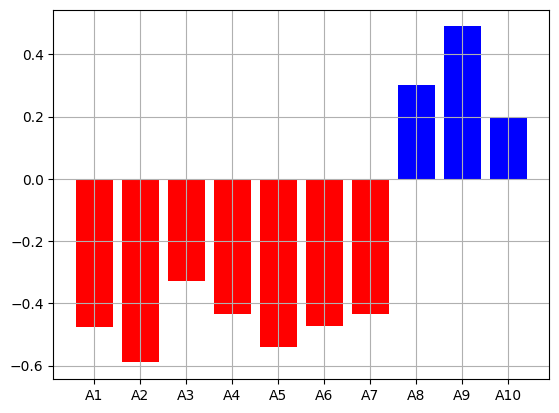

In [124]:
#plt.scatter(A1_values.iloc[:,0],A1_values.iloc[:,1])
E1 = loadings_df.iloc[:10,0]
plt.bar(E1.index,E1.values, color = ["blue" if l > 0 else "red" for l in E1.values])
plt.grid()
plt.show()

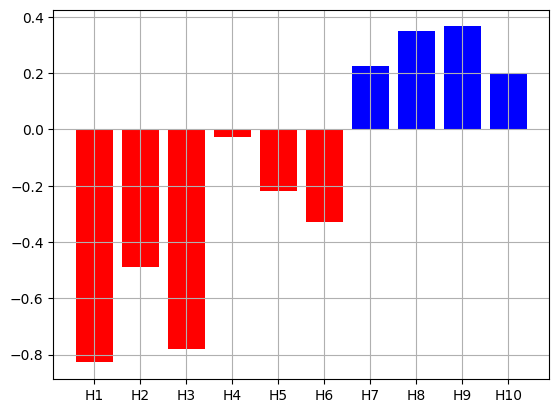

In [122]:
H2 = loadings_df.iloc[20:30,1]
plt.bar(H2.index,H2.values, color = ["blue" if l > 0 else "red" for l in H2.values])
plt.grid()
plt.show()

In [23]:
# Inspect communalities
communalities = np.sum(factor_loadings ** 2, axis=1)
communalities_df = pd.DataFrame({'Variable': col_data, 'Communality': communalities})
communalities_df

,Variable,Communality
0,A1,0.435701
1,A2,0.506535
2,A3,0.336528
3,A4,0.330195
4,A5,0.495281
5,A6,0.402360
6,A7,0.327963
7,A8,0.118968
8,A9,0.345022
9,A10,0.110972


H1 had the highest communality of all of the variables. No other variable had a high enough communality to be notable. 